In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

from ipynb.fs.full.functions import compute_ols, compute_ols_intercept, plot_residuals

## Load the data:

In [2]:
data = pd.read_csv('data/clean_data.csv')

data.head()

,Price_2015,Tobac_Use_M,Tobac_Use_F,Tax_2015,Happiness_Score,Afford_2015,Ban_Score_Dir_Ads,Ban_Score_Indr_Ads,Ban_Score_add_indir_ads,Warn_Score,Ban_Score_places
0,1.905,51.2,7.6,65.195,4.959,3.920,8,8,3,50.0,8
1,2.220,29.5,18.4,75.045,6.574,1.310,7,10,5,50.0,8
2,1.370,52.3,1.5,34.165,4.350,3.945,5,2,0,50.0,3
3,6.060,35.5,34.8,74.835,7.200,1.225,7,8,5,65.0,2
4,1.780,46.5,0.4,17.705,5.212,2.055,8,8,3,30.0,3


#### Make inputs and targets

In [5]:
y_f = data['Tobac_Use_F']

# Keep all columns
cols = ['Price_2015',
        'Tax_2015',
        'Happiness_Score', 'Afford_2015', 'Ban_Score_Dir_Ads',
        'Ban_Score_Indr_Ads', 'Ban_Score_add_indir_ads', 'Warn_Score',
        'Ban_Score_places']

# Instantiate x
x = data[cols]

### Regresion model:
We investigate two different models. In the first investigation, we consider the intercept, which means there are considerable parameters which are not included in the model. This model will result in more realistic results but in the most cases not much promising. However, if we ignore the intercept and consider our data as the complete possible data in zero state of our perception about the subject, we get more promissing model fits data.
In the real world we should consider both sides. We reach the realistic overview about the situation and what we don't know and cannot change and then investigate the model without bias to optimize it as well based on our known facts and data.

## Consider Intercept

In [6]:
# Model with intercept and all features.
res_f_intercept = compute_ols_intercept(x, y_f)

print("Female results considering intercept:")
print(res_f_intercept.summary())

Female results considering intercept:
                            OLS Regression Results                            
Dep. Variable:            Tobac_Use_F   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     9.010
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           2.47e-09
Time:                        00:57:49   Log-Likelihood:                -316.44
No. Observations:                  92   AIC:                             652.9
Df Residuals:                      82   BIC:                             678.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

/home/andrew/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


##### Results:

As can be seen by p-values, only tax is significant.


** Significand treshold is 0.05

##### The error investigation:

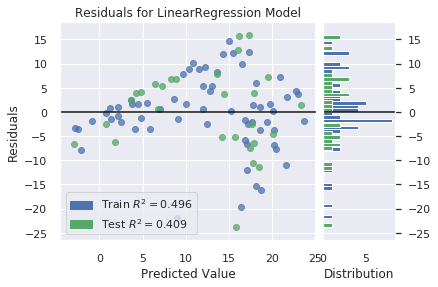

In [20]:
plot_residuals(x, y_f, 'Male_residual_errors', standard=True)

The residual diagram shows fairly noraml distribution and, the comparison between train and test shows the improvement in values for test, which means the model works well on data.

#### Remove not-significant parameters:

In [21]:
# Keep just significant parameters
cols = ['Tax_2015']

# Instantiate x
x_rem = data[cols]

# Model with intercept and significant features.
res_f_intercept = compute_ols_intercept(x_rem, y_f)

print("Female results considering intercept with significant features:")
print(res_f_intercept.summary())

Female results considering intercept with significant features:
                            OLS Regression Results                            
Dep. Variable:            Tobac_Use_F   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     70.82
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           5.64e-13
Time:                        01:13:34   Log-Likelihood:                -321.36
No. Observations:                  92   AIC:                             646.7
Df Residuals:                      90   BIC:                             651.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

/home/andrew/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### Result: 

The significant indicators are not changed. Althought the difference between R-squared valud and Adjusted R-squared is decreased, the overall value of both parameters are sligthly detriorated.

##### The error investigation:

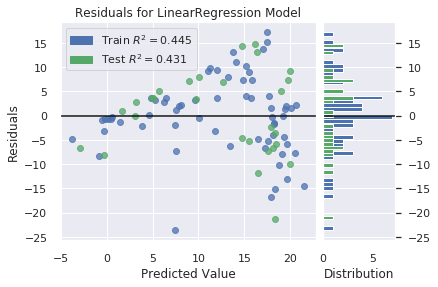

In [22]:
plot_residuals(x_rem, y_f, 'Female_residual_errors', standard=True)

#### Result:
The errors of train and test are closer to each other and so the model is more reliable.

### Checking the OLS assumptions

#### Linearity

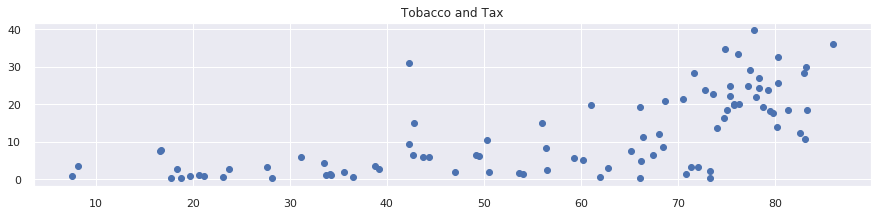

In [23]:
# Here we use some matplotlib code
# Use plt.scatter() for each of them (with your current knowledge)
# But since Tobaco_Use_M is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data['Tax_2015'],data['Tobac_Use_F'])
ax1.set_title('Tobacco and Tax')


plt.show()

The scatter plot shows fairly linear relation between tobacco consumption and tax as the significant indicator.

#### Homoscedasticity
The normal distribution of error satisfies homoscelasticity criteria for linear regression.

#### Multicollinearity
Just on indicator and so there is no colinearity.

### Descriptive investigation
The only remained regressor that remained is the tax, which means inaddition to the unknown factors which are contained in intercept, the only imortant factor for femal conumers is the tax that affects on the price and their affordability. 

## No Intercept

It means, we have ignored all unknown prarmeters and assumed system in zero state at first, without any bias. But, we know that constant (bias) is a significant parameter in the model. So this investigation just show us how much we cand infer from our data by keeping all bias information away or simply ignore them and assume the system in zero-state.

In [24]:
# Model without intercept but with all features.
res_f_without = compute_ols(x, y_f)

print("Female results without considering intercept:")
print(res_f_without.summary())

Female results without considering intercept:
                                 OLS Regression Results                                
Dep. Variable:            Tobac_Use_F   R-squared (uncentered):                   0.781
Model:                            OLS   Adj. R-squared (uncentered):              0.757
Method:                 Least Squares   F-statistic:                              32.79
Date:                Sun, 05 Apr 2020   Prob (F-statistic):                    9.55e-24
Time:                        01:13:51   Log-Likelihood:                         -316.67
No. Observations:                  92   AIC:                                      651.3
Df Residuals:                      83   BIC:                                      674.0
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [

##### Results:
Firstly we can see that the R-squared and ajdusted R-squared are much improved. 
However, still the only significant parameter is the tax as the intercept was not significant by itself, so it will not have much effects on the other parameters.

##### The error investigation:

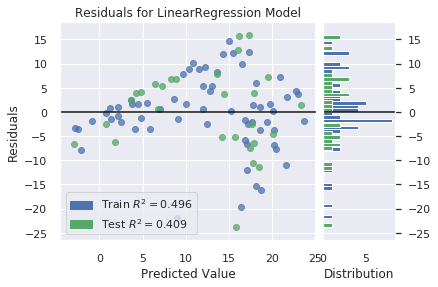

In [25]:
plot_residuals(x, y_f, 'Female_residual_errors', standard=True)

The difference between squared residuals of train and test data set is not significant. So the model fits well.

In [26]:
# Keep significant columns
cols = ['Tax_2015']

# Instantiate x
cleaned_x = data[cols]

# Model without intercept but with significant features.
res_m_without = compute_ols(cleaned_x, y_f)

print("Male results without considering intercept:")
print(res_m_without.summary())

Male results without considering intercept:
                                 OLS Regression Results                                
Dep. Variable:            Tobac_Use_F   R-squared (uncentered):                   0.737
Model:                            OLS   Adj. R-squared (uncentered):              0.734
Method:                 Least Squares   F-statistic:                              254.9
Date:                Sun, 05 Apr 2020   Prob (F-statistic):                    4.00e-28
Time:                        01:14:04   Log-Likelihood:                         -325.01
No. Observations:                  92   AIC:                                      652.0
Df Residuals:                      91   BIC:                                      654.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.97

#### Summary:
Although the R-score is detriorated slightly, but, it's much closer to adjusted R-squared.

F-statistics shows fairly good modeling with high significance. The positive coeficient of tax indicates its positive impact on tobacco consumption which shows us, that the tobacco is a Giffen good for female consumers, that its demand is increased by increasing the tax (indirectly the price).

##### The error investigation:

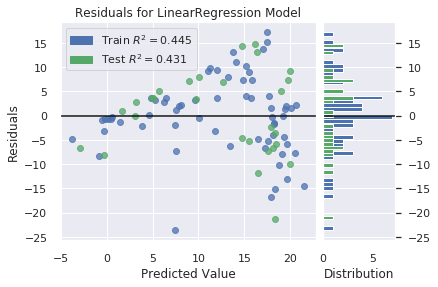

In [27]:
plot_residuals(cleaned_x, y_f, 'Female_residual_errors', standard=True)

The error of train and test are decreased and much close to each other, so the model is working well without bias and non-significant indicators.

## Checking the OLS assumptions

#### Linearity

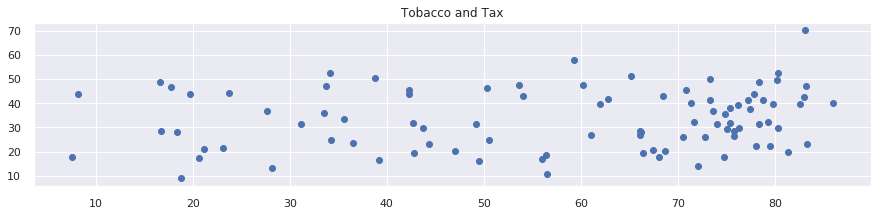

In [31]:
# Here we use some matplotlib code
# Use plt.scatter() for each of them (with your current knowledge)
# But since Tobaco_Use_M is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y

ax1.scatter(data['Tax_2015'],data['Tobac_Use_M'])
ax1.set_title('Tobacco and Tax')


plt.show()

The scatter plots show fairly linear relation between tobacco consumption and the tax as the significant indicator.

#### Homoscedasticity
The normal distribution of error satisfy homoscelasticity criteria for linear regression.

#### Not autocorrelation
The Durbin-watson value in the summary of linear regression is around 2 which shows there is no autocorrelation between erros.

#### Multicollinearity
There is just one regressor remained, so this condition is not meaningful.